In [2]:
from difflib import SequenceMatcher
from pprint import pprint

In [3]:
# ฟังก์ชันตรวจสอบความคล้ายคลึง
def is_similar(text1, text2, threshold=0.8):
    ratio = SequenceMatcher(None, text1, text2).ratio()
    return ratio >= threshold

# รวมกลุ่มประโยคที่คล้ายกัน
def group_similar_sentences(sentences, threshold=0.8):
    grouped = []
    for sentence in sentences:
        found = False
        for group in grouped:
            if is_similar(sentence, group[0], threshold):
                group.append(sentence)
                found = True
                break
        if not found:
            grouped.append([sentence])
    return grouped

In [4]:
sentences_list = ['วันนี้อากาศดีมาก',
 'ฉันชอบอ่านหนังสือเกี่ยวกับปัญญาประดิษฐ์',
 'การเดินทางช่วยเปิดโลกทัศน์ของเรา',
 'เทคโนโลยีกำลังเปลี่ยนแปลงวิถีชีวิตของเรา',
 'แมวของฉันชอบนอนในที่อุ่น',
 'การเรียนรู้ไม่มีที่สิ้นสุด',
 'คุณชอบฟังเพลงประเภทไหน',
 'การออกกำลังกายทำให้ร่างกายแข็งแรง',
 'หนังสือเล่มนี้สนุกและได้ความรู้',
 'ธรรมชาติมอบความสงบและพลังใจ',
 'คุณเคยไปเที่ยวภูเขาบ้างไหม',
 'การเขียนโค้ดเป็นทักษะที่สำคัญในยุคนี้',
 'ชีวิตคือการเดินทางที่ไม่มีวันหยุด',
 'กาแฟยามเช้าทำให้ฉันรู้สึกสดชื่น',
 'ฉันกำลังเรียนรู้เกี่ยวกับการพัฒนาโมเดลปัญญาประดิษฐ์',
 'อากาศวันนี้สดชื่นมาก',
 'ฟ้าสดใสจนทำให้รู้สึกดีทั้งวัน',
 'อากาศเย็นสบายเหมาะกับการออกไปเดินเล่น',
 'วันนี้ไม่มีฝนและอากาศก็ดีมาก',
 'แดดอ่อนๆ และลมเย็นทำให้อารมณ์ดี',
 'หนังสือเกี่ยวกับ AI เป็นสิ่งที่ฉันโปรดปราน',
 'ฉันสนใจเรื่องปัญญาประดิษฐ์และหาหนังสือมาอ่านบ่อยๆ',
 'การอ่านหนังสือ AI ทำให้ฉันเข้าใจเทคโนโลยีมากขึ้น',
 'ปัญญาประดิษฐ์เป็นหัวข้อที่ฉันชอบศึกษา',
 'ฉันมักจะเลือกหนังสือที่เกี่ยวกับ AI มาอ่านเสมอ',
 'การเดินทางทำให้เราเห็นมุมมองใหม่ๆ',
 'การไปสถานที่ใหม่ช่วยให้เราเรียนรู้มากขึ้น',
 'การท่องเที่ยวช่วยเพิ่มประสบการณ์ชีวิต',
 'การเดินทางไกลทำให้เราเข้าใจวัฒนธรรมอื่นๆ',
 'ทุกครั้งที่เดินทาง ฉันได้เรียนรู้อะไรใหม่ๆ',
 'เทคโนโลยีสมัยใหม่มีผลต่อชีวิตประจำวันของเรา',
 'ชีวิตของเราถูกขับเคลื่อนด้วยนวัตกรรมเทคโนโลยี',
 'เทคโนโลยีช่วยให้เราทำสิ่งต่างๆ ได้สะดวกขึ้น',
 'ยุคดิจิทัลเปลี่ยนแปลงทุกอย่างในชีวิตประจำวัน',
 'เรากำลังอยู่ในยุคที่เทคโนโลยีคือหัวใจสำคัญ',
 'แมวที่บ้านมักจะหาที่อุ่นๆ นอนเสมอ',
 'แมวของฉันชอบขดตัวอยู่บนผ้าห่ม',
 'มันชอบนอนในที่ที่แสงแดดส่องถึง',
 'เจ้าเหมียวชอบซุกตัวในมุมอุ่นๆ',
 'แมวของฉันนอนบนหมอนอุ่นทั้งวัน',
 'ไม่มีวันไหนที่เราเรียนรู้ไม่ได้',
 'การเรียนรู้เป็นกระบวนการที่ไม่เคยหยุดนิ่ง',
 'ชีวิตคือการเรียนรู้สิ่งใหม่ๆ เสมอ',
 'เราเรียนรู้ได้จากทุกสถานการณ์ในชีวิต',
 'ความรู้อยู่รอบตัวเราให้เราเรียนรู้ตลอดเวลา',
 'เพลงแนวไหนที่คุณฟังแล้วรู้สึกผ่อนคลาย',
 'คุณมีเพลงโปรดที่ชอบฟังเป็นพิเศษไหม',
 'คุณชอบฟังเพลงที่มีจังหวะแนวไหน',
 'เพลงแบบไหนที่ทำให้คุณรู้สึกมีความสุข',
 'คุณชอบฟังเพลงเก่าหรือเพลงใหม่มากกว่ากัน',
 'ออกกำลังกายช่วยให้สุขภาพดีขึ้นมาก',
 'การออกกำลังกายช่วยเพิ่มพลังงานในชีวิตประจำวัน',
 'เมื่อเราออกกำลังกาย ร่างกายจะกระปรี้กระเปร่า',
 'การเล่นกีฬาเป็นวิธีหนึ่งที่ทำให้แข็งแรง',
 'สุขภาพดีเริ่มต้นจากการออกกำลังกาย',
 'หนังสือเล่มนี้เต็มไปด้วยเนื้อหาที่น่าสนใจ',
 'ฉันชอบเนื้อหาของหนังสือเล่มนี้มาก',
 'อ่านหนังสือเล่มนี้แล้วได้ความรู้ใหม่ๆ',
 'หนังสือเล่มนี้ทั้งสนุกและให้ข้อมูลที่ดี',
 'ฉันเรียนรู้อะไรหลายอย่างจากหนังสือเล่มนี้',
 'การอยู่ใกล้ธรรมชาติทำให้ใจสงบ',
 'ธรรมชาติช่วยให้เรารู้สึกผ่อนคลาย',
 'การเดินเล่นในธรรมชาติเสริมสร้างพลังใจ',
 'ธรรมชาติเป็นที่พักพิงของจิตใจเรา',
 'อยู่กับธรรมชาติแล้วรู้สึกสดชื่นและสงบ',
 'คุณเคยปีนเขาในที่สูงๆ ไหม',
 'คุณเคยสัมผัสบรรยากาศภูเขายามเช้าไหม',
 'คุณเคยตั้งแคมป์บนภูเขาหรือยัง',
 'คุณมีประสบการณ์เดินป่าบนภูเขาไหม',
 'คุณชอบวิวภูเขาที่ปกคลุมด้วยหมอกหรือเปล่า',
 'การเขียนโปรแกรมเป็นทักษะที่จำเป็นในยุคดิจิทัล',
 'ทุกคนควรเรียนรู้การเขียนโค้ดในยุคปัจจุบัน',
 'การเขียนโค้ดช่วยเพิ่มโอกาสในสายงานเทคโนโลยี',
 'การพัฒนาโค้ดเป็นพื้นฐานสำคัญในอุตสาหกรรม IT',
 'การเขียนโปรแกรมทำให้เราแก้ปัญหาได้อย่างสร้างสรรค์',
 'ชีวิตคือการเรียนรู้และก้าวไปข้างหน้า',
 'ทุกช่วงเวลาในชีวิตคือการผจญภัยใหม่ๆ',
 'ชีวิตเปรียบเสมือนการเดินทางที่ไม่มีจุดสิ้นสุด',
 'ทุกวันคือการเดินทางของเราในเส้นทางชีวิต',
 'ชีวิตต้องเดินต่อไปแม้ว่าจะเจออุปสรรค',
 'กลิ่นกาแฟยามเช้าทำให้วันเริ่มต้นได้ดี',
 'การดื่มกาแฟตอนเช้าทำให้ฉันมีพลัง',
 'กาแฟแก้วแรกช่วยปลุกฉันให้ตื่นเต็มตา',
 'รสชาติกาแฟตอนเช้าเป็นสิ่งที่ฉันโปรดปราน',
 'กาแฟอุ่นๆ ทำให้เช้าวันใหม่สดใสขึ้น',
 'ฉันกำลังศึกษาวิธีสร้างโมเดล AI',
 'การพัฒนาโมเดล AI เป็นสิ่งที่ฉันกำลังฝึกฝน',
 'ฉันสนใจการสร้างโมเดล Machine Learning',
 'การเรียนรู้การออกแบบโมเดล AI เป็นเป้าหมายของฉัน',
 'ฉันกำลังศึกษาแนวทางใหม่ๆ ในการพัฒนา AI',
 'อากาศวันนี้สดชื่นมาก',
 'ฟ้าสดใสจนทำให้รู้สึกดีทั้งวัน',
 'อากาศเย็นสบายเหมาะกับการออกไปเดินเล่น',
 'วันนี้ไม่มีฝนและอากาศก็ดีมาก',
 'แดดอ่อนๆ และลมเย็นทำให้อารมณ์ดี',
 'หนังสือเกี่ยวกับ AI เป็นสิ่งที่ฉันโปรดปราน',
 'ฉันสนใจเรื่องปัญญาประดิษฐ์และหาหนังสือมาอ่านบ่อยๆ',
 'การอ่านหนังสือ AI ทำให้ฉันเข้าใจเทคโนโลยีมากขึ้น',
 'ปัญญาประดิษฐ์เป็นหัวข้อที่ฉันชอบศึกษา',
 'ฉันมักจะเลือกหนังสือที่เกี่ยวกับ AI มาอ่านเสมอ',
 'การเดินทางทำให้เราเห็นมุมมองใหม่ๆ',
 'การไปสถานที่ใหม่ช่วยให้เราเรียนรู้มากขึ้น',
 'การท่องเที่ยวช่วยเพิ่มประสบการณ์ชีวิต',
 'การเดินทางไกลทำให้เราเข้าใจวัฒนธรรมอื่นๆ',
 'ทุกครั้งที่เดินทาง ฉันได้เรียนรู้อะไรใหม่ๆ',
 'เทคโนโลยีสมัยใหม่มีผลต่อชีวิตประจำวันของเรา',
 'ชีวิตของเราถูกขับเคลื่อนด้วยนวัตกรรมเทคโนโลยี',
 'เทคโนโลยีช่วยให้เราทำสิ่งต่างๆ ได้สะดวกขึ้น',
 'ยุคดิจิทัลเปลี่ยนแปลงทุกอย่างในชีวิตประจำวัน',
 'เรากำลังอยู่ในยุคที่เทคโนโลยีคือหัวใจสำคัญ',
 'แมวที่บ้านมักจะหาที่อุ่นๆ นอนเสมอ',
 'แมวของฉันชอบขดตัวอยู่บนผ้าห่ม',
 'มันชอบนอนในที่ที่แสงแดดส่องถึง',
 'เจ้าเหมียวชอบซุกตัวในมุมอุ่นๆ',
 'แมวของฉันนอนบนหมอนอุ่นทั้งวัน',
 'ไม่มีวันไหนที่เราเรียนรู้ไม่ได้',
 'การเรียนรู้เป็นกระบวนการที่ไม่เคยหยุดนิ่ง',
 'ชีวิตคือการเรียนรู้สิ่งใหม่ๆ เสมอ',
 'เราเรียนรู้ได้จากทุกสถานการณ์ในชีวิต',
 'ความรู้อยู่รอบตัวเราให้เราเรียนรู้ตลอดเวลา',
 'เพลงแนวไหนที่คุณฟังแล้วรู้สึกผ่อนคลาย',
 'คุณมีเพลงโปรดที่ชอบฟังเป็นพิเศษไหม',
 'คุณชอบฟังเพลงที่มีจังหวะแนวไหน',
 'เพลงแบบไหนที่ทำให้คุณรู้สึกมีความสุข',
 'คุณชอบฟังเพลงเก่าหรือเพลงใหม่มากกว่ากัน',
 'ออกกำลังกายช่วยให้สุขภาพดีขึ้นมาก',
 'การออกกำลังกายช่วยเพิ่มพลังงานในชีวิตประจำวัน',
 'เมื่อเราออกกำลังกาย ร่างกายจะกระปรี้กระเปร่า',
 'การเล่นกีฬาเป็นวิธีหนึ่งที่ทำให้แข็งแรง',
 'สุขภาพดีเริ่มต้นจากการออกกำลังกาย',
 'หนังสือเล่มนี้เต็มไปด้วยเนื้อหาที่น่าสนใจ',
 'ฉันชอบเนื้อหาของหนังสือเล่มนี้มาก',
 'อ่านหนังสือเล่มนี้แล้วได้ความรู้ใหม่ๆ',
 'หนังสือเล่มนี้ทั้งสนุกและให้ข้อมูลที่ดี',
 'ฉันเรียนรู้อะไรหลายอย่างจากหนังสือเล่มนี้',
 'การอยู่ใกล้ธรรมชาติทำให้ใจสงบ',
 'ธรรมชาติช่วยให้เรารู้สึกผ่อนคลาย',
 'การเดินเล่นในธรรมชาติเสริมสร้างพลังใจ',
 'ธรรมชาติเป็นที่พักพิงของจิตใจเรา',
 'อยู่กับธรรมชาติแล้วรู้สึกสดชื่นและสงบ',
 'คุณเคยปีนเขาในที่สูงๆ ไหม',
 'คุณเคยสัมผัสบรรยากาศภูเขายามเช้าไหม',
 'คุณเคยตั้งแคมป์บนภูเขาหรือยัง',
 'คุณมีประสบการณ์เดินป่าบนภูเขาไหม',
 'คุณชอบวิวภูเขาที่ปกคลุมด้วยหมอกหรือเปล่า',
 'การเขียนโปรแกรมเป็นทักษะที่จำเป็นในยุคดิจิทัล',
 'ทุกคนควรเรียนรู้การเขียนโค้ดในยุคปัจจุบัน',
 'การเขียนโค้ดช่วยเพิ่มโอกาสในสายงานเทคโนโลยี',
 'การพัฒนาโค้ดเป็นพื้นฐานสำคัญในอุตสาหกรรม IT',
 'การเขียนโปรแกรมทำให้เราแก้ปัญหาได้อย่างสร้างสรรค์',
 'ชีวิตคือการเรียนรู้และก้าวไปข้างหน้า',
 'ทุกช่วงเวลาในชีวิตคือการผจญภัยใหม่ๆ',
 'ชีวิตเปรียบเสมือนการเดินทางที่ไม่มีจุดสิ้นสุด',
 'ทุกวันคือการเดินทางของเราในเส้นทางชีวิต',
 'ชีวิตต้องเดินต่อไปแม้ว่าจะเจออุปสรรค',
 'กลิ่นกาแฟยามเช้าทำให้วันเริ่มต้นได้ดี',
 'การดื่มกาแฟตอนเช้าทำให้ฉันมีพลัง',
 'กาแฟแก้วแรกช่วยปลุกฉันให้ตื่นเต็มตา',
 'รสชาติกาแฟตอนเช้าเป็นสิ่งที่ฉันโปรดปราน',
 'กาแฟอุ่นๆ ทำให้เช้าวันใหม่สดใสขึ้น',
 'ฉันกำลังศึกษาวิธีสร้างโมเดล AI',
 'การพัฒนาโมเดล AI เป็นสิ่งที่ฉันกำลังฝึกฝน',
 'ฉันสนใจการสร้างโมเดล Machine Learning',
 'การเรียนรู้การออกแบบโมเดล AI เป็นเป้าหมายของฉัน',
 'ฉันกำลังศึกษาแนวทางใหม่ๆ ในการพัฒนา AI']


In [5]:
grouped_sentences = group_similar_sentences(sentences_list, threshold=0.4)

In [6]:
pprint(grouped_sentences)

[['วันนี้อากาศดีมาก',
  'อากาศวันนี้สดชื่นมาก',
  'วันนี้ไม่มีฝนและอากาศก็ดีมาก',
  'อากาศวันนี้สดชื่นมาก',
  'วันนี้ไม่มีฝนและอากาศก็ดีมาก'],
 ['ฉันชอบอ่านหนังสือเกี่ยวกับปัญญาประดิษฐ์',
  'ฉันกำลังเรียนรู้เกี่ยวกับการพัฒนาโมเดลปัญญาประดิษฐ์',
  'หนังสือเกี่ยวกับ AI เป็นสิ่งที่ฉันโปรดปราน',
  'ฉันสนใจเรื่องปัญญาประดิษฐ์และหาหนังสือมาอ่านบ่อยๆ',
  'ฉันมักจะเลือกหนังสือที่เกี่ยวกับ AI มาอ่านเสมอ',
  'ฉันชอบเนื้อหาของหนังสือเล่มนี้มาก',
  'ฉันเรียนรู้อะไรหลายอย่างจากหนังสือเล่มนี้',
  'หนังสือเกี่ยวกับ AI เป็นสิ่งที่ฉันโปรดปราน',
  'ฉันสนใจเรื่องปัญญาประดิษฐ์และหาหนังสือมาอ่านบ่อยๆ',
  'ฉันมักจะเลือกหนังสือที่เกี่ยวกับ AI มาอ่านเสมอ',
  'ฉันชอบเนื้อหาของหนังสือเล่มนี้มาก',
  'ฉันเรียนรู้อะไรหลายอย่างจากหนังสือเล่มนี้'],
 ['การเดินทางช่วยเปิดโลกทัศน์ของเรา',
  'ชีวิตคือการเดินทางที่ไม่มีวันหยุด',
  'การเดินทางทำให้เราเห็นมุมมองใหม่ๆ',
  'การเดินทางไกลทำให้เราเข้าใจวัฒนธรรมอื่นๆ',
  'ทุกวันคือการเดินทางของเราในเส้นทางชีวิต',
  'กาแฟแก้วแรกช่วยปลุกฉันให้ตื่นเต็มตา',
  'การเดินทางทำให้เราเห็

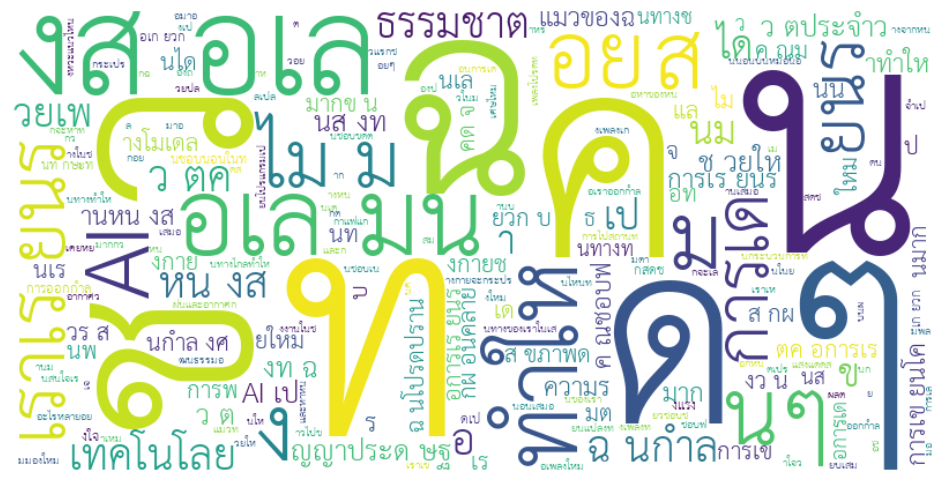

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all sentences in grouped_sentences into a single string
all_sentences = ' '.join([' '.join(group) for group in grouped_sentences])

# Generate the word cloud with Thai font
wordcloud = WordCloud(
    font_path='THSarabunNew.ttf',  # ระบุฟอนต์ภาษาไทย เช่น THSarabunNew
    width=800,
    height=400,
    background_color='white',
    colormap='viridis'  # คุณสามารถเปลี่ยนโทนสีได้ เช่น 'viridis', 'plasma', 'cividis'
).generate(all_sentences)

# Display the word cloud
plt.figure(figsize=(12, 6))  # ขยายขนาดเพื่อให้อ่านง่ายขึ้น
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # ซ่อนแกน
plt.show()

In [8]:
# %pip install googletrans==4.0.0-rc1 -q

In [9]:
# from googletrans import Translator

# # สร้างตัวแปลภาษา
# translator = Translator()

# # แปลข้อความใน sentences_list
# translated_sentences = [translator.translate(sentence, src='th', dest='en').text for sentence in sentences_list]

# # แสดงผลลัพธ์
# pprint(translated_sentences)

In [10]:
translated_sentences =  ['Today the weather is very good.',
 'I like to read books about artificial intelligence.',
 'Travel helps to open our world.',
 'Technology is changing our way of life.',
 'My cat likes to sleep in a warm place.',
 'Endless learning',
 'What kind of music do you like?',
 'Exercise makes the body strong.',
 'This book is fun and knowledgeable.',
 'Nature provides peace and mind.',
 'Have you ever been to the mountain?',
 'Writing code is an important skill in this era.',
 'Life is a journey without holidays.',
 'Morning coffee makes me feel refreshed.',
 "I'm learning about the development of artificial intelligence models.",
 'The weather today is very refreshing.',
 'The sky is so bright that it feels good all day.',
 'The weather is cool, suitable for walking.',
 'Today there is no rain and the weather is very good.',
 'Soft sun and cool wind makes a good mood.',
 'AI books are my favorite.',
 'I am interested in artificial intelligence and find books to read often.',
 'Reading AI books makes me understand technology better.',
 'Artificial intelligence is a topic that I like to study.',
 'I always choose books about AI to read.',
 'Traveling makes us see new perspectives.',
 'Going to a new place helps us to learn more.',
 'Tourism helps to increase life experiences.',
 'Traveling long makes us understand other cultures.',
 'Every time travelingI learned something new',
 'Modern technology affects our daily lives.',
 'Our lives are driven by technology innovation.',
 'Technology helps us to do things more conveniently.',
 'The digital age changed everything in everyday life.',
 'We are in an age where technology is the key.',
 'Cats at home always find a warm place to sleep.',
 'My cat likes to curl on the blanket.',
 'It likes to sleep in a place where the sunlight is shining.',
 'The cat likes to hide in a warm corner.',
 'My cat lay on a warm pillow all day.',
 "There is no day that we can't learn.",
 'Learning is a process that never stops.',
 'Life is always learning new things.',
 'We can learn from every situation in life.',
 'Knowledge is all around us, let us learn all the time.',
 'Which type of song you listen to and feel relaxed?',
 'Do you have a favorite favorite song?',
 'What kind of rhythm do you like to listen to?',
 'What kind of songs make you feel happy?',
 'You like to listen to old songs or new songs.',
 'Exercise helps to improve much health.',
 'Exercise helps increase energy in daily life.',
 'When we exerciseThe body will be energetic.',
 'Playing sports is one way to strengthen.',
 'Good health, starting with exercise',
 'This book is full of interesting content.',
 'I really like the content of this book.',
 'Read this book and get new knowledge.',
 'This book is both fun and providing good information.',
 'I learned many things from this book.',
 'Being near nature makes the heart calm.',
 'Nature helps us to relax.',
 'Strolling in nature strengthens the heart.',
 'Nature is a shelter of our minds.',
 'Stay with nature and feel refreshed and calm',
 'Have you ever climbed in a high place?',
 'Have you ever experienced the morning mountain atmosphere?',
 'Have you ever been camping on the mountain yet?',
 'Do you have experience in hiking on the mountain?',
 'Do you like the mountain view that is covered with fog?',
 'Programming is an essential skill in the digital age.',
 'Everyone should learn to write code in modern times.',
 'Code writing helps to increase opportunities in technology.',
 'Code development is an important foundation in the IT industry.',
 'Programming allows us to solve the problem creatively.',
 'Life is learning and moving forward.',
 'Every moment in life is new adventures.',
 'Life is like an endless journey.',
 'Every day is our journey on the path of life.',
 'Life must continue to walk, even if encountering obstacles.',
 'Morning coffee smells good day.',
 'Drinking coffee in the morning makes me power.',
 'The first coffee helps to wake me up.',
 'The morning coffee taste is my favorite.',
 'Warm coffee makes the new morning brighter.',
 'I am studying how to create AI models.',
 'The development of AI models is what I am practicing.',
 'I was interested in creating Machine Learning models.',
 'Learning the design of AI models is my target.',
 'I am studying new ways to develop AI.',
 'The weather today is very refreshing.',
 'The sky is so bright that it feels good all day.',
 'The weather is cool, suitable for walking.',
 'Today there is no rain and the weather is very good.',
 'Soft sun and cool wind makes a good mood.',
 'AI books are my favorite.',
 'I am interested in artificial intelligence and find books to read often.',
 'Reading AI books makes me understand technology better.',
 'Artificial intelligence is a topic that I like to study.',
 'I always choose books about AI to read.',
 'Traveling makes us see new perspectives.',
 'Going to a new place helps us to learn more.',
 'Tourism helps to increase life experiences.',
 'Traveling long makes us understand other cultures.',
 'Every time travelingI learned something new',
 'Modern technology affects our daily lives.',
 'Our lives are driven by technology innovation.',
 'Technology helps us to do things more conveniently.',
 'The digital age changed everything in everyday life.',
 'We are in an age where technology is the key.',
 'Cats at home always find a warm place to sleep.',
 'My cat likes to curl on the blanket.',
 'It likes to sleep in a place where the sunlight is shining.',
 'The cat likes to hide in a warm corner.',
 'My cat lay on a warm pillow all day.',
 "There is no day that we can't learn.",
 'Learning is a process that never stops.',
 'Life is always learning new things.',
 'We can learn from every situation in life.',
 'Knowledge is all around us, let us learn all the time.',
 'Which type of song you listen to and feel relaxed?',
 'Do you have a favorite favorite song?',
 'What kind of rhythm do you like to listen to?',
 'What kind of songs make you feel happy?',
 'You like to listen to old songs or new songs.',
 'Exercise helps to improve much health.',
 'Exercise helps increase energy in daily life.',
 'When we exerciseThe body will be energetic.',
 'Playing sports is one way to strengthen.',
 'Good health, starting with exercise',
 'This book is full of interesting content.',
 'I really like the content of this book.',
 'Read this book and get new knowledge.',
 'This book is both fun and providing good information.',
 'I learned many things from this book.',
 'Being near nature makes the heart calm.',
 'Nature helps us to relax.',
 'Strolling in nature strengthens the heart.',
 'Nature is a shelter of our minds.',
 'Stay with nature and feel refreshed and calm',
 'Have you ever climbed in a high place?',
 'Have you ever experienced the morning mountain atmosphere?',
 'Have you ever been camping on the mountain yet?',
 'Do you have experience in hiking on the mountain?',
 'Do you like the mountain view that is covered with fog?',
 'Programming is an essential skill in the digital age.',
 'Everyone should learn to write code in modern times.',
 'Code writing helps to increase opportunities in technology.',
 'Code development is an important foundation in the IT industry.',
 'Programming allows us to solve the problem creatively.',
 'Life is learning and moving forward.',
 'Every moment in life is new adventures.',
 'Life is like an endless journey.',
 'Every day is our journey on the path of life.',
 'Life must continue to walk, even if encountering obstacles.',
 'Morning coffee smells good day.',
 'Drinking coffee in the morning makes me power.',
 'The first coffee helps to wake me up.',
 'The morning coffee taste is my favorite.',
 'Warm coffee makes the new morning brighter.',
 'I am studying how to create AI models.',
 'The development of AI models is what I am practicing.',
 'I was interested in creating Machine Learning models.',
 'Learning the design of AI models is my target.',
 'I am studying new ways to develop AI.']


In [11]:
grouped_sentences = group_similar_sentences(translated_sentences, threshold=0.4)

In [12]:
pprint(grouped_sentences)

[['Today the weather is very good.',
  'The weather today is very refreshing.',
  'The weather is cool, suitable for walking.',
  'Today there is no rain and the weather is very good.',
  "There is no day that we can't learn.",
  'I really like the content of this book.',
  'I learned many things from this book.',
  'Nature is a shelter of our minds.',
  'Do you like the mountain view that is covered with fog?',
  'I am studying how to create AI models.',
  'Learning the design of AI models is my target.',
  'The weather today is very refreshing.',
  'The weather is cool, suitable for walking.',
  'Today there is no rain and the weather is very good.',
  "There is no day that we can't learn.",
  'I really like the content of this book.',
  'I learned many things from this book.',
  'Nature is a shelter of our minds.',
  'Do you like the mountain view that is covered with fog?',
  'I am studying how to create AI models.',
  'Learning the design of AI models is my target.'],
 ['I like to

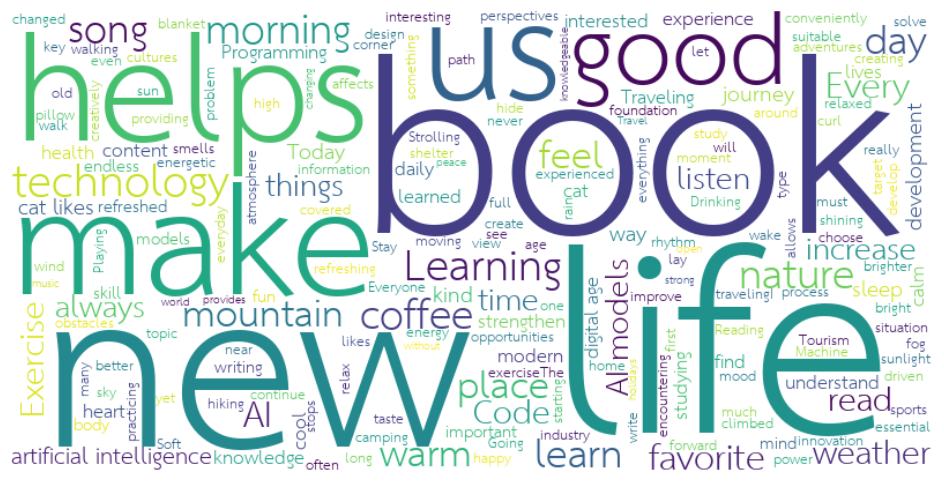

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all sentences in translated_sentences into a single string
all_sentences = ' '.join([' '.join(group) for group in grouped_sentences])

# Generate the word cloud with Thai font
wordcloud = WordCloud(
    font_path='THSarabunNew.ttf',  # ระบุฟอนต์ภาษาไทย เช่น THSarabunNew
    width=800,
    height=400,
    background_color='white',
    colormap='viridis'  # คุณสามารถเปลี่ยนโทนสีได้ เช่น 'viridis', 'plasma', 'cividis'
).generate(all_sentences)

# Display the word cloud
plt.figure(figsize=(12, 6))  # ขยายขนาดเพื่อให้อ่านง่ายขึ้น
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # ซ่อนแกน
plt.show()